# QUÉ ES EL PRE-PROCESAMIENTO DE LOS DATOS?



Estre proceso viene posterior a la limpeza y análisis exploratorio de los datos. 

Consiste en preparar los datos para el modelamiento. Es necesario recordar que los modelos de ML requieren entradas númericas, por lo tanto, si el dataset tiene variables categóricas es necesario transformarlas. 

Considerar el preprocesamiento de datos como un pre-requisito para el modelamiento.

En primer lugar, revisemos algunos de los procesos básicos que se realizan con los datos.

In [1]:
import pandas as pd

df = pd.read_csv('https://bit.ly/2G3kCmH')
df.head()

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5022,37237,500,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,Strengthening Communities,...,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5055,37425,15,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,Environment,...,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(665, 35)

Un paso útil para comenzar es ver la lista de columnas que se tienen en el dataset: 


In [3]:
df.columns

Index(['opportunity_id', 'content_id', 'vol_requests', 'event_time', 'title',
       'hits', 'summary', 'is_priority', 'category_id', 'category_desc',
       'amsl', 'amsl_unit', 'org_title', 'org_content_id', 'addresses_count',
       'locality', 'region', 'postalcode', 'primary_loc', 'display_url',
       'recurrence_type', 'hours', 'created_date', 'last_modified_date',
       'start_date_date', 'end_date_date', 'status', 'Latitude', 'Longitude',
       'Community Board', 'Community Council ', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

Luego para identificar los tipos de datos: 

In [4]:
df.dtypes

opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int64
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64
Census Tract          float64
BIN                   float64
BBL       

Repasando los conceptos se tiene que: 

* object: Corresponde a string/ tipos mixtos
* int64: Corresponde a enteros
* float64: Corresponde a decimales

Reconocer los tipos de datos es importante antes de realizar cualquier tipo de preprocesamiento. 

Otro elemento que nos puede dar información general respecto a los datos que vamos a manejar es el atributo *describe* que nos entrega una sintesis de las estadísticas. Recordar que esto solo aplica para variables númericas. 

In [5]:
df.describe()

,opportunity_id,content_id,vol_requests,event_time,hits,category_id,amsl,amsl_unit,org_content_id,addresses_count,...,primary_loc,hours,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
count,665.000000,665.000000,665.000000,665.0,665.000000,617.000000,0.0,0.0,665.000000,665.000000,...,0.0,665.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5374.454135,42790.643609,78.778947,0.0,345.409023,2.105348,NaN,NaN,20752.207519,1.046617,...,NaN,0.027068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,234.322154,5491.720274,569.763773,0.0,530.716526,1.412003,NaN,NaN,19143.034346,0.537109,...,NaN,0.519952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4952.000000,36697.000000,1.000000,0.0,0.000000,1.000000,NaN,NaN,24.000000,1.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5175.000000,38414.000000,3.000000,0.0,102.000000,1.000000,NaN,NaN,2138.000000,1.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5377.000000,40222.000000,12.000000,0.0,204.000000,2.000000,NaN,NaN,4442.000000,1.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5580.000000,49308.000000,30.000000,0.0,374.000000,3.000000,NaN,NaN,39189.000000,1.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5782.000000,52894.000000,9999.000000,0.0,4662.000000,6.000000,NaN,NaN,52858.000000,12.000000,...,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Otro punto impotante es saber la cantidad de valores NaN existentes en los datos. 

In [6]:
df.isnull().sum()

opportunity_id          0
content_id              0
vol_requests            0
event_time              0
title                   0
hits                    0
summary                 0
is_priority           603
category_id            48
category_desc          48
amsl                  665
amsl_unit             665
org_title               0
org_content_id          0
addresses_count         0
locality               70
region                  0
postalcode              6
primary_loc           665
display_url             0
recurrence_type         0
hours                   0
created_date            0
last_modified_date      0
start_date_date         0
end_date_date           0
status                  0
Latitude              665
Longitude             665
Community Board       665
Community Council     665
Census Tract          665
BIN                   665
BBL                   665
NTA                   665
dtype: int64

Al realizar esto, se puede determinar que se tienen columnas donde todos los datos son NaN, por lo tanto, en este caso se procedera a eliminar dichas columnas. Eliminar una columna entera no siempre es recomendable, depende solo de la información e importancia que tenga dicha columna. 

In [7]:
Nan = (df.isnull().sum() == df.shape[0])
Nan = Nan[Nan == True].index.tolist()
df = df.drop(Nan, axis = 1)
df.head()

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,region,postalcode,display_url,recurrence_type,hours,created_date,last_modified_date,start_date_date,end_date_date,status
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,NY,NaN,/opportunities/4996,onetime,0,January 13 2011,June 23 2011,July 30 2011,July 30 2011,approved
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,NY,10010.0,/opportunities/5008,onetime,0,January 14 2011,January 25 2011,February 01 2011,February 01 2011,approved
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,NY,10026.0,/opportunities/5016,onetime,0,January 19 2011,January 21 2011,January 29 2011,January 29 2011,approved
3,5022,37237,500,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,Strengthening Communities,...,NY,2114.0,/opportunities/5022,ongoing,0,January 21 2011,January 25 2011,February 14 2011,March 31 2012,approved
4,5055,37425,15,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,Environment,...,NY,10455.0,/opportunities/5055,onetime,0,January 28 2011,February 01 2011,February 05 2011,February 05 2011,approved


Retomando el trabajo con los tipos de datos, se pueden dar casos donde el tipo de dato manejado es incorrecto, por ejemplo, cuando un dato númerico se ingreso como string. Esto genera un problema dado que dicha columna no se podrá utilizar para las operaciones númericas aún cuando los datos representen números. 

Para realizar estas conversiones de tipos de datos se puede utilizar *astype()*.

---

**ANEXO**


Uno de los pasos más necesarios para el pre-procesamiento es separar los conjuntos en train y test. Realizar esto también nos ayuda a evitar el **sobreajuste (overfitting).**

Si se entrena un modelo con todos los datos del dataset no existiria forma de probar ni validar el modelo. Tener un conjunto de prueba permite tener datos que el modelo no ha visto anteriormente. 

Supongamos que para este problema se busca predecir la variable *'category_desc'*. Veamos los valores que toma esta variable: 


In [8]:
df['category_desc'].value_counts()

Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64

Dado que los valores de las características no son similares, no están balanceadas, se puede utilizar un parámetro al momento de realizar la separación para mantener la distribución de las clases.

Esta columna presenta ciertos valores NaN, por lo tanto, dado que el objetivo de este ejemplo no es hablar sobre el manejo de NaN se eliminaran las filas con estos valores. 

In [9]:
df.dropna(subset=['category_desc'], inplace = True)

In [10]:
df.shape

(617, 24)

En primer lugar, generemos las variables necesarias para el modelo: 

In [11]:
X = df.drop('category_desc', axis = 1)
y = df['category_desc']

Ahora realicemos la separación:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

Comparemos las distribuciones de los conjuntos creados: 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

dist_train = y_train.value_counts().to_frame(name='Cantidad')
dist_train['Proporción'] = dist_train['Cantidad']/sum(dist_train['Cantidad'])

dist_train

,Cantidad,Proporción
Strengthening Communities,230,0.497835
Helping Neighbors in Need,89,0.192641
Education,69,0.149351
Health,39,0.084416
Environment,24,0.051948
Emergency Preparedness,11,0.023810


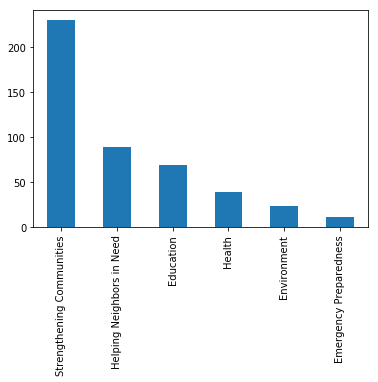

In [14]:
dist_train['Cantidad'].plot(kind='bar');

In [15]:
dist_test = y_test.value_counts().to_frame(name='Cantidad')
dist_test['Proporción'] = dist_test['Cantidad']/sum(dist_test['Cantidad'])
dist_test

,Cantidad,Proporción
Strengthening Communities,77,0.496774
Helping Neighbors in Need,30,0.193548
Education,23,0.148387
Health,13,0.083871
Environment,8,0.051613
Emergency Preparedness,4,0.025806


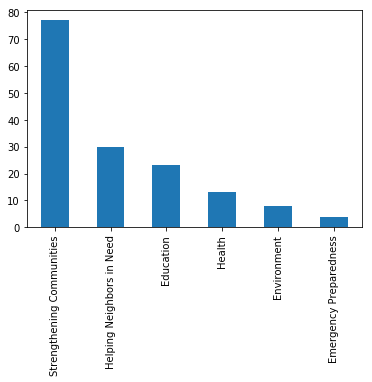

In [16]:
dist_test['Cantidad'].plot(kind='bar');

Es importante mantener las distribuciones de los datos en la separación para evitar inducir el sesgo en los modelos. 
 

# Standardizing Data

Es probable encontrar datasets con que tengan ciertas inconsistencias en su estructura tales como virianzas muy grandes o diferentes escalas de datos. La solución de pre-procesamiento para esto corresponde a la estandarización: 



La estandarización consiste en transformar datos continuos para que parezcan normalmente distribuidos. En Scikit-Learn es un paso necesario, dado que muchos modelos asumen que los datos con los que se entrena el modelo están normalmente distribuidos, si esto no ocurre se corre riesgo de sesgar el modelo. 

Existen muchos formas de estandarizar los datos, a continuación se verán dos formas: 

1. Log normalization
2. Scaling

Es importante considerar que la estandarización es un pre-procesamiento que aplica solo a datos númericos continuos. Para los datos categóricos se utiliza otros métodos. 





### Bajo que casos se estandariza? 

1. Si se utiliza cualquier modelo que trabaja con medidas de distancias lineales u opera en un espacio lineal como: 

        a. k-NN
        b. Regresión Linear
        c. K-means
    
    Estos modelos asumen que los datos que se le entregan estan relacionadas linealmente o se pueden medir con una metrica de distancia lineal. 
    

2. Casos donde las características tienen una varianza elevada. Esto puede sesgar un modelo que asume que los datos están normalmente distribuidos.

    Si una característica en el dataset tiene una varianza mucho mayor que otras características, esto puede tener un impacto en la capacidad del modelo de aprender de otras características. 
    
    
3. Modelar un dataset que contiene características continuas que tienen diferentes escalas es otro motivo. Por ejemplo, si un dataset tiene una columna relacionada al alto y otra al ancho, para comparar estar características deben estar en el mismo espacio linear, y por lo tanto, se debe estandarizar. 
    
    
4. Todos estos escenarios suponen que se esta trabajando con un modelo que asume que las características son lineales.  
    

Dado que los métodos de estandarización trabajan con datos continuos, vamos a utilizar un nuevo dataset para ejemplificar esto de mejor manera.

Veamos que contiene este dataset...

In [17]:
wine = pd.read_csv('https://bit.ly/2G8OTRh')
wine.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
wine.shape

(178, 14)

In [19]:
wine.dtypes

Type                              int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [20]:
wine.isnull().sum()

Type                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Podemos observar que para este dataset solo tenemos variables númericas y sin nulos. Por lo tanto, vamos a generar un modelo con este dataset.

In [21]:
wine.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


En este dataset, se tiene una variable que tiene una varianza extemadamente alta en comparación al resto que es *'Proline'*. 

Este corresponde a un problema de clasificación donde se busca predecir la variable *'Type'*. 

In [22]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

Vamos a seleccionar las características utilizadas para este modelo.

In [23]:
y = wine['Type']
X = wine[['Proline', 'Total phenols', 'Hue', 'Nonflavanoid phenols']]

Veamos distintos casos...

## Log Normalization

Es un método de estandarización que puede ser útil cuando se tiene una columna particular con una varianza elevada. 

En el ejemplo se puede observar que el puntaje de exactitud no fue muy elevado. Esto se debe a que en los datos utilizados para la predicción la variable *'Proline'* tiene una varianza muy elevada lo cual afecta la exactitud del modelo. 

La normalización logarítmica aplica una transformación logarítmica a los valores, lo cual transforma los valores a una escala que se aproxima a una distribución normal. Algo que asumen muchos modelos. 

Esta normalización es una buena estrategia cuando la preocupación son cambios relativos en un modelo lineal, cuando se quiere capturar la magnitud del cambio y cuando se quiere mantener todo en el espacio positivo. 

Es una buena forma de minimizar la varianza de una columna y hacer que sea comparable a otras columnas del modelo. 

Aplicar este método en Python es sencillo, veamos como hacerlo:


In [24]:
# Comprobemos la varianza de la columna 'Proline'
wine['Proline'].var()

99166.71735542428

Vamos a ver la distribución de la variable antes la normalización: 

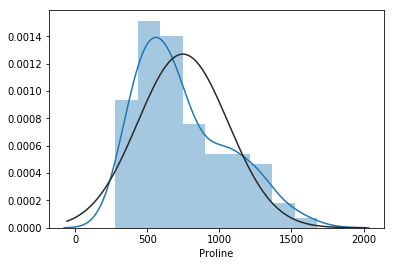

In [25]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(wine['Proline'], fit= norm)

Apliquemos la normalización y veamos todo de nuevo: 

In [26]:
# Aplicamos la transformación en una nueva columna y veamos la varianza:
import numpy as np

wine['Proline_log'] = np.log(wine['Proline'])

wine['Proline_log'].var()

0.17231366191842018

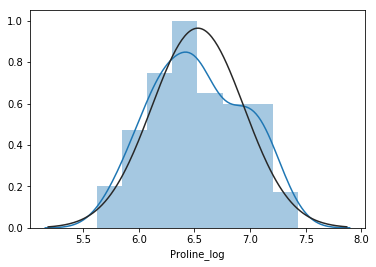

In [27]:
sns.distplot(wine['Proline_log'],fit=norm)

Para este primer caso, vamos a ver el rendimiento del modelo antes y despúes de una normalización logarítmica:

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Score: \n', knn.score(X_test, y_test))

print('\n Classification Report:', classification_report(y_test, y_predict))

Score: 
 0.7333333333333333

 Classification Report:               precision    recall  f1-score   support

           1       0.82      0.88      0.85        16
           2       0.82      0.86      0.84        21
           3       0.17      0.12      0.14         8

   micro avg       0.73      0.73      0.73        45
   macro avg       0.60      0.62      0.61        45
weighted avg       0.70      0.73      0.72        45



Veamos luego de estandarizar...

In [29]:
X_log = wine[['Proline_log', 'Total phenols', 'Hue', 'Nonflavanoid phenols']]

X_train, X_test, y_train, y_test = train_test_split(X_log, y, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Score: \n', knn.score(X_test, y_test))

print('\n Classification Report:', classification_report(y_test, y_predict))

Score: 
 0.9777777777777777

 Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.95      0.98        21
           3       0.89      1.00      0.94         8

   micro avg       0.98      0.98      0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



Veamos otro método de estandarización...

## Scaling Data

Es un método de estandarización útil cuando se tiene un dataset con características continuas que tienen diferentes escalas para un modelo que opera en un espacio linear (como regresión linear o k-NN). 

Es escalamiento de características transforma las características del dataset para que tengan una media de cero y una varianza de 1. 

Esto hace más fácil la comparación lineal de características al transformar los datos a una distribución lo más cercana a la normal.  

Veamos un ejemplo...

Vamos a utilizar las siguientes características de nuestro dataset: 

In [30]:
X = wine[['Ash', 'Alcalinity of ash', 'Magnesium']]
X.head()

,Ash,Alcalinity of ash,Magnesium
0,2.43,15.6,127
1,2.14,11.2,100
2,2.67,18.6,101
3,2.50,16.8,113
4,2.87,21.0,118


In [31]:
X.var()

Ash                    0.075265
Alcalinity of ash     11.152686
Magnesium            203.989335
dtype: float64

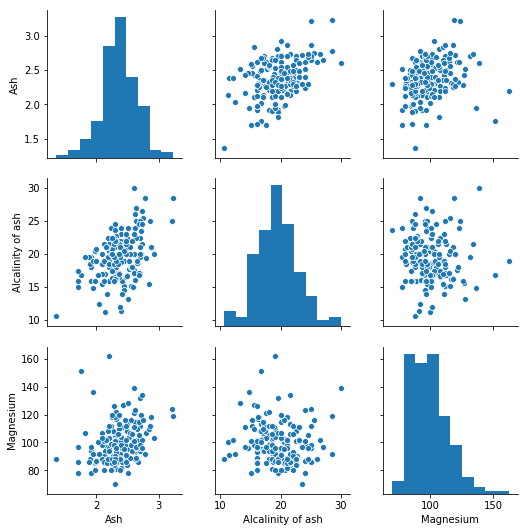

In [32]:
sns.pairplot(X)

Es posible observar que la varianza de las columnas no es elevada pero el rango de valore entre las columnas tiene escalas muy distintas. Por lo tanto, escalar los datos puede ser una buena opción. 


#### Standard Scaler 

Este método remueve la media y escala cada característica para que tengan una varianza. 

El beneficio de utilizar el objeto scaler de sklearn es que se puede aplicar la misma transformación en otros datos sin tener que escalar nuevamente todos los datos. 


Veamos que ocurre al escalar los valores: 

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaling = ss.fit_transform(X)

X_scaling = pd.DataFrame(X_scaling, columns = X.columns)

X_scaling.head()

def multi_table(lista):
    from IPython.core.display import HTML
    return HTML('<table><tr style="background-color:none;">'+ ''.join(['<td>'+ table._repr_html_()+'</td>' for table in lista])+'</tr></table>')

multi_table([ X.head(), X_scaling.head()])

C:\Users\crack\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\crack\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Ash,Alcalinity of ash,Magnesium
0,2.43,15.6,127
1,2.14,11.2,100
2,2.67,18.6,101
3,2.50,16.8,113
4,2.87,21.0,118
,Ash,Alcalinity of ash,Magnesium
0,0.232053,-1.169593,1.913905
1,-0.827996,-2.490847,0.018145
2,1.109334,-0.268738,0.088358
3,0.487926,-0.809251,0.930918


Comparando los valores antes y despúes de escalar se observan los cambios en los en la escala de los datos. 

Veamos la comparación respecto a las varianzas: 


In [34]:
multi_table([X.var().to_frame(name = 'Var'), X_scaling.var().to_frame(name = 'Var')])

,Var
Ash,0.075265
Alcalinity of ash,11.152686
Magnesium,203.989335
,Var
Ash,1.00565
Alcalinity of ash,1.00565
Magnesium,1.00565


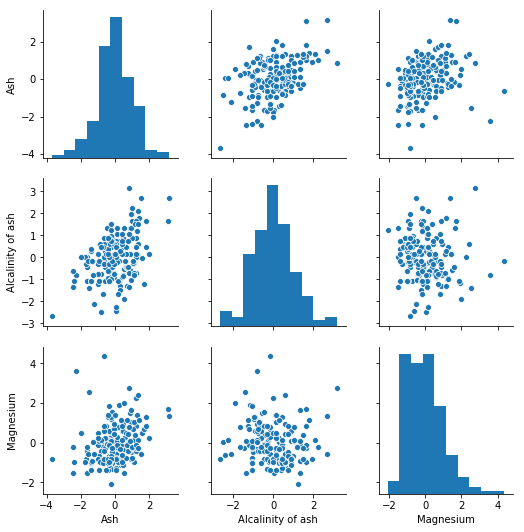

In [35]:
sns.pairplot(X_scaling)

Se puede apreciar que las características pasaron de tener varianzas diferentes en cada caso a tener una misma varianza en todas. 

Muchos modelos requieren que los datos esten escalados adecuadamente entre las columnas, de otra forma hay riesgo de sesgar los resultados. 

Veamos los efectos que tiene la estandarización en los modelos. Primero el resultado sin StandardScaler:



In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

print('Score: \n', knn.score(X_test, y_test))

print('\n Classification Report:', classification_report(y_test, y_predict))



Score: 
 0.6

 Classification Report:               precision    recall  f1-score   support

           1       0.79      0.69      0.73        16
           2       0.73      0.52      0.61        21
           3       0.31      0.62      0.42         8

   micro avg       0.60      0.60      0.60        45
   macro avg       0.61      0.61      0.59        45
weighted avg       0.68      0.60      0.62        45



Ahora veamos la diferencia con StandatdScaler: 


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaling, y, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

print('Score: \n', knn.score(X_test, y_test))

print('\n Classification Report:', classification_report(y_test, y_predict))

Score: 
 0.7555555555555555

 Classification Report:               precision    recall  f1-score   support

           1       0.76      0.81      0.79        16
           2       0.94      0.71      0.81        21
           3       0.50      0.75      0.60         8

   micro avg       0.76      0.76      0.76        45
   macro avg       0.73      0.76      0.73        45
weighted avg       0.80      0.76      0.77        45



# Feature Engineering

Consiste en la creación de nuevas características basado en características existentes y agregar información útil al dataset. 

Añade información útil para las tareas de predicción o clusterización y entrega una idea de la relación entre características. 

Los datasets reales no están limpios y ordenados, por lo tanto, además de limpieza y estandarización de datos, probablemente se tiene que extraer y expander información de las columnas existentes. 

Veamos algunos métodos manuales de ingeniería de características. 

Estos métodos requieren un conocimiento del dataset que se esta trabajando y dependen particularmente de este.  

Existen distintos casos en los que se busca aplicar, tales como:

1. Uno de los más comunes es con datos de textos, por ejemplo para el procesamiento de lenguaje natural. 

2. Datos string, por ejemplo, el registro del color favorito de una persona. Para procesar esta información en un modelo es necesario codificar la información númericamente. 

3. Series temporales que incluyen el tiempo en segundos o milisegundos, que puede ser muy específico para una tarea de predicción, por lo que se puede querer predecir una columna con días o meses. 

## Codificar Variables Categóricas

### Codificar Variables Binarias

Esto se puede realizar tanto en pandas como sklearn.

En pandas se puede utilizar la función *apply* para convertir los valores a 1 y 0. 

Veamos un ejemplo: 

In [38]:
users = {'user':[1,2,3,4], 'suscribed':['y','n','n','y'], 'fav_color':['blue','green','orange','green']}
users = pd.DataFrame(data = users)

users

,user,suscribed,fav_color
0,1,y,blue
1,2,n,green
2,3,n,orange
3,4,y,green


Convirtamos la columna *suscribed* a números: 

In [39]:
users['sub_cod'] = users['suscribed'].apply(lambda val: 1 if val == 'y' else 0)

users[['suscribed', 'sub_cod']]

,suscribed,sub_cod
0,y,1
1,n,0
2,n,0
3,y,1


Veamos como hacer lo mismo con sklearn: 


In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
users['sub_cod_le'] = le.fit_transform(users['suscribed'])

users[['suscribed', 'sub_cod', 'sub_cod_le']]

,suscribed,sub_cod,sub_cod_le
0,y,1,1
1,n,0,0
2,n,0,0
3,y,1,1


Otra opción para realizar esto es con *"one_hot_encoding"* que codifica variables categóricas a 1 y 0 cuando se tienen más de dos variables para codificar. 

Este método trabaja con la lista de valores únicos en una columna, transformando cada valor en un arreglo y designando un 1 en la posición a codificar donde ese valor en particular ocurre. 

Se puede utilizar la función *get_dummies* en pandas para codificar directamente valores categóricos. 

Veamos un ejemplo: 

In [41]:
multi_table([users[['user','fav_color']],pd.get_dummies(users['fav_color'])])

## Engineering Numerical Features

A continuación, veremos como añadir estadísticas y fechas para agregar valor al dataset. 

Cuando se tiene un conjunto de características relacionadas con una sola característica, por ejemplo temperatura o tiempo de una carrera, una opción es calcular la media o mediana para utilizar como una característica para el modelo en lugar de todo el conjunto. 

Una practica común es tomar un agregado de un conjunto de números para utilizar en lugar de todas las caractéristicas. 

Esto puede ser útil para reducir las dimensiones del espacio de características o simplemente no necesitan muchos valores similares que están cercanos entre si. 

Veamos un ejemplo...

In [42]:
df = pd.DataFrame({'city':['c1','c2','c3','c4'],'day 1':[31.2, 27.5, 28.0, 26.9],
                   'day 2':[25.2, 29.5, 26.0, 28.9], 'day 3':[21.2, 17.5, 18.0, 22.9]})
df['mean'] = round(df.iloc[:,1:].mean(axis=1))
df


,city,day 1,day 2,day 3,mean
0,c1,31.2,25.2,21.2,26.0
1,c2,27.5,29.5,17.5,25.0
2,c3,28.0,26.0,18.0,24.0
3,c4,26.9,28.9,22.9,26.0


Del ejemplo anterior, podemos utilizar solo la media de los días para no trabajar con información que hace refencia a un mismo comportamiento y que estaría muy cercana en un mismo espacio lineal. 

Veamos un ejemplo con fechas...

In [43]:
df = pd.DataFrame({'Date':['January 30 2017', 'February 01 2018', 'March 26 2018'], 'Purchase':['$45.500','$19.000','$22.000']})

# primero vamos a convertir la columna a un formato de fecha: 
df['Date_conv'] = pd.to_datetime(df['Date'])

# ahora podemos aplicar nuevamente el método apply:
df['day'] = df['Date_conv'].apply(lambda row: row.day)
df['month'] = df['Date_conv'].apply(lambda row: row.month)
df['year'] = df['Date_conv'].apply(lambda row: row.year)

df

,Date,Purchase,Date_conv,day,month,year
0,January 30 2017,$45.500,2017-01-30,30,1,2017
1,February 01 2018,$19.000,2018-02-01,1,2,2018
2,March 26 2018,$22.000,2018-03-26,26,3,2018


# Feature Selection


Una vez trabajadas todas las características del dataset es importante analizar dichas características. ¿Realmente se necesitan todas las características? ¿Sabemos como van a impactar al modelo estas características?  

Feature selection consiste en seleccionar las característcas del conjunto que se utilizarán para el modelo. No es lo mismo que Feature Engineering dado que no crea nuevas características. 

El objetivo principal de esto consiste en mejorar el rendimiento del modelo. 

Suele ocurrir que las dimensiones de los dataset con los que se trabaja son muy grandes o algunas características no son necesarias. 

Sklearn tiene distintas formas de seleccionar automaticamente las características tales como: 

* variance treshold
* univariate statistical tests

No obstante, nos vamos a enfocar en los métodos manuales.

Vamos a analizar tres casos para selección de características: 

1. Casos con características redundantes que solo agregan ruido al modelo. 
2. Casos con características correlacionadas fuertemente que van en contra de los supuestos que realizan ciertos modelos y, por ende, impactan el rendimiento del modelo. 
3. Si las dimensiones del modelo son muy grandes puede ser útil aplicar reducción de dimensiones para combinar y reducir el número de características en el dataset para que también se reduzca la varianza global. 

## Características Redundantes


La forma más fácil para determinar si una característica es innecesaria es si de alguna forma es redundante. Por ejemplo, si dos columnas tiene la misma información en dos formas distintas o si dos características están fuertemente correlacionadas. 

Al crear características nuevas con feature engineering de alguna forma se pueden generar duplicados de las características existentes. 

Estas características redundantes se pueden identificar manualmente solo entendiendo las características que contienen el dataset y la información que nos indican. 

Es importante considerar que, como en todo proceso de ML en general, la selección de características es un proceso iterativo. Es probable que se modifiquen las características a lo largo del proceso solo para determinar si tienen un impacto en el rendimiento del modelo, determinando nuevamente la selección de características para la iteración. 

Veamos algunos casos de cuando realizar selección de características (eliminar características redundantes): 

1. Al momento de representar diversas columnas que hacen referencia a un mismo registro de información, y mediante feature engineering se crea una nueva columna que representa a todas las demás, no será necesario utilizar todas las columnas en el modelo final. 

3. Cuando las características están fuertemente correlacionadas, es decir, se cambiar una variable cambia la otra. Los modelos lineales, asumen que las características son independientes entre si, por lo tanto, si las características están correlacionadas pueden introducir un sesgo en el modelo. 

2. Una columna de texto de la cual ya se ha extraido la información útil. 

3. Una columna categórica que ha sido codificada mediante *'one-hot encoding'*. 

4. Información redudante para determinar a que tipo de objeto corresponde la muestra, por ejemplo el nombre de una fruta y su nombre científico. 

## Reducción de Dimensiones

Es un método de aprendizaje no supervisado que transforma los datos de una forma tal que reduce el número de características en el espacio de características. 

Esta transformación se puede realizar de manera lineal como no lineal. 

La reducción de dimensiones (dimensionality reduction) es método de extracción de características dado que los datos son transformados en nuevas columnas diferentes. 

Veamos un método de reducción de dimensiones: 

### PCA | Principal Component Analysis

PCA utiliza una transformación lineal para proyectar características en un espacio donde están completemante no correlacionadas. 

Mientras que se reduce el espacio de características, la variaza se registra en modo significativo combinando características en componentes.

PCA captura, en cada componente, la mayor varianza posible en los datos. 

En cuanto a selección de características, es un método primordial cuando se tienen grandes cantidades de características sin opciones claras para eliminar (como las mencionadas en los casos redundantes). 

Por defecto, PCA in sklearn mantiene el número de componentes igual al número de características entrantes. 

Al imprimir el atributo *'explained_variance_ratio'* se puede ver por componente el porcentaje de varianza explicado por ese componente. Por lo tanto, podemos descartar los componentes que no explican gran varianza. 

**Puntos a considerar: **

1. Es complejo explicar e interpretar los componentes de PCA más allá de que componente explica la mayor varianza. PCA es un método que funciona como especie de *"caja negra"*. 

2. Es un buen método para utilizar **al final** del trabajo de pre-procesamiento dado a la forma en que los datos se transformas y cambian de forma. El único trabajo que se puede realizar simplemente post PCA es eliminar aquellos componentes que no son útiles explicando la varianza. 

## Veamos un ejemplo que aplique todos los conceptos vistos anteriormente...

Los datos utilizados para este ejemplo son referentes a los avistamientos de UFO (Undentify Fliying Object | OVNI). 

Cada fila contiene la siguiente información: 

1. 'datetime': Fecha y hora
2. 'city': Ciudad donde ocurrío
3. 'state': Estado donde ocurrío
4. 'country': País donde ocurrío
5. 'shape': Forma del objeto
6. 'duration (seconds)': Duración en segundos
7. 'duration (hours/min)': Duración en horas y minutos
8. 'comments': Descripsión del avistamiento
9. 'date posted': Fecha de publicación
10. 'latitude': Latitud del avistamiento (coordenada)
11. 'longitud': Longitud del avistamiento (coordenada)

Vamos a inciar el pre-procesamiento del dataset...

#### 1. Importar los datos:

In [44]:
UFO = pd.read_csv('https://bit.ly/2xKpVDg', error_bad_lines=False)

b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\nSkipping line 9571: expected 11 fields, saw 12\nSkipping line 9620: expected 11 fields, saw 12\nSkipping line 9751: expected 11 fields, saw 12\nSkipping line 10157: expected 11 fields, saw 12\nSkipping line 10427: expected 11 fields, saw 12\nSkipping line 12035: expected 11 fiel

Las advertencias al momento de importar los datos se deben a errores en ciertas lineas que tienen más columnas que el resto de dataframe, por lo tanto, se van a saltar esas columnas para generar el registro. 

In [45]:
UFO.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


#### 2. Revisar tipos de datos:

In [46]:
UFO.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

Se observan los siguientes errores en los tipos de datos: 

* 'datetime' y 'date posted' corresponden a formato de fecha no objeto. 
* 'latitude' corresponde a float no object

Vamos a modificar estos errores: 

1. Vamos a separar la columna 'datetime' en dos columnas y cambiar el formato de dichas columnas: 

    a. Una columna que va tener los datos de las fechas del avistamiento
    
    b. Una columna que tener los datos de las horas del avistamiento
    
    
2. La columna 'date posted' se cambiara. 

In [47]:
fechas = []
horas = []
for x in UFO['datetime']:
    x = x.split(' ')
    fechas.append(x[0])
    horas.append(x[1])
    
UFO['date'] = pd.Series(fechas)
UFO['hours'] = pd.Series(horas)

UFO['date'] = pd.to_datetime(UFO['date'])
UFO['date posted'] = pd.to_datetime(UFO['date posted'])


En el caso de 'hours' se modificará las 24:00 por 00:00

In [48]:
UFO['hours'][UFO['hours'] == '24:00'] = '00:00'

C:\Users\crack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
UFO.dtypes

datetime                        object
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted             datetime64[ns]
latitude                        object
longitude                      float64
date                    datetime64[ns]
hours                           object
dtype: object

En el caso de 'latitude' hay filas que vienen con letras entre los números, por lo tanto, es necesario realizar una extracción mediante expresiones regulares: 

In [50]:
import re 

pattern = re.compile('\d+\.\d+')
lat = []

for y,x in enumerate(UFO['latitude']):
    x = str(x)
    x = re.match(pattern, x)
    if x is None:
        x = float('0.0')
#         print(x)
    else: 
        x = float(x.group(0))
#         print(x)
    lat.append(x)

In [51]:
UFO['latitude'] = pd.Series(lat)

Veamos nuevamente los tipos de datos que tiene el dataframe: 

In [52]:
UFO.dtypes

datetime                        object
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted             datetime64[ns]
latitude                       float64
longitude                      float64
date                    datetime64[ns]
hours                           object
dtype: object

Ya se modificaron todos los tipos de datos incorrectos. Pero ahora se tiene información duplicada en el dataframe respecto a las fechas y horas de avistamiento. 

Vamos a crear un nuevo dataframe sin esta información redundante: 

In [53]:
UFOs = UFO[['date', 'hours', 'city', 'state', 'country','shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude']]

In [54]:
UFOs.head()

,date,hours,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10,20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10,21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10,17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10,21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10,20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


#### 3. EDA

Determinemos la cantidad de NaN en las columnas: 

In [55]:
nan = UFOs.isnull().sum().to_frame(name='Q')
nan['%'] = (nan/sum(nan['Q']))*100
nan

,Q,%
date,0,0.000000
hours,0,0.000000
city,0,0.000000
state,7409,28.770581
country,12365,48.015688
shape,2922,11.346692
duration (seconds),2,0.007766
duration (hours/min),3019,11.723361
comments,35,0.135912
date posted,0,0.000000


Veamos más a detalle los datos que tienen las columnas...


1. Datos de city:

In [56]:
UFOs['city'].value_counts()

seattle                                                            570
phoenix                                                            488
portland                                                           399
las vegas                                                          395
los angeles                                                        375
san diego                                                          361
houston                                                            317
chicago                                                            295
miami                                                              258
tucson                                                             258
orlando                                                            237
albuquerque                                                        229
austin                                                             229
springfield                                                        228
sacram

Dado la gran cantidad de cuidades donde se tienen los registros vamos a ver cuales son las 10 más recurrentes: 

In [57]:
UFOs['city'].value_counts()[:10]

seattle        570
phoenix        488
portland       399
las vegas      395
los angeles    375
san diego      361
houston        317
chicago        295
miami          258
tucson         258
Name: city, dtype: int64

Desde punto podemos dar cuenta que la mayoría de los avistamientos son provenientes de ciudades de USA. 

2. Datos de State:

In [58]:
UFOs['state'].value_counts(dropna = False)

ca     10449
NaN     7409
wa      4650
fl      4596
tx      4041
ny      3506
az      2938
il      2874
pa      2780
oh      2638
mi      2253
nc      2018
or      2012
mo      1723
on      1718
co      1653
nj      1639
in      1533
va      1517
ga      1474
ma      1464
wi      1426
tn      1310
mn      1174
sc      1169
ct      1061
ky      1000
md       979
nv       979
nm       910
       ...  
id       607
nh       574
mt       574
wv       539
ms       460
ne       446
ak       395
hi       383
ab       374
vt       334
ri       312
wy       228
sd       216
de       200
qc       197
mb       174
ns       163
nd       151
nb       131
dc       117
sk       111
pq       102
sa        38
pr        36
nf        31
pe        23
nt        23
yt        14
yk         7
vi         1
Name: state, Length: 69, dtype: int64

Al igual que en el caso anterior, se tienen grandes cantidades de respuestas. Vamos a considerar cuales son los 10 principales: 

In [59]:
UFOs['state'].value_counts(dropna = False)[:10]

ca     10449
NaN     7409
wa      4650
fl      4596
tx      4041
ny      3506
az      2938
il      2874
pa      2780
oh      2638
Name: state, dtype: int64

En este caso se observa que se tiene una gran cantidad de NaN que se deben tratar, para esto se puede realizar un reemplazo de NaN basado en la columna *city* que no tiene valores faltantes. Veamos como hacer esto: 

In [60]:
# veamos las filas que tienen NaN en state: 

UFOs[UFOs['state'].isnull()]

,date,hours,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
2,1955-10-10,17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
6,1965-10-10,21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000
18,1973-10-10,23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,2002-01-11,32.364167,-64.678611
21,1974-10-10,21:30,cardiff (uk/wales),NaN,gb,disk,1200,20 minutes,back in 1974 I was 19 at the time and lived i...,2007-02-01,51.500000,-3.200000
25,1976-10-10,22:00,stoke mandeville (uk/england),NaN,gb,cigar,3,3 seconds,White object over Buckinghamshire UK.,2009-12-12,51.783333,-0.783333
36,1982-10-10,07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,2002-01-11,0.000000,178.017649
40,1985-10-10,20:25,leeds (uk/england),NaN,gb,triangle,600,10min,three light in the sky that led to a big black...,2003-03-04,53.800000,-1.583333
58,1993-10-10,03:00,zlatoust (russia),NaN,NaN,sphere,1200,20 minutes,I woke up at night and looked out the window n...,2004-12-14,55.183333,59.650000
69,1996-10-10,20:00,lake macquarie (nsw&#44 australia),NaN,NaN,light,300,5 min,RED LIGHT WITH OTHER RED FLASHING LIGHT&#44 ON...,1999-05-24,0.000000,151.588982
76,1998-10-10,02:00,turin (italy),NaN,NaN,disk,15,15 sec,We were doing a patrol during the night&#44me ...,2005-01-19,0.000000,0.000000


In [61]:
UFOs[UFOs['city'] == 'bermuda nas']['state'].mode()

Series([], dtype: object)

In [62]:
UFOs['country'].value_counts(dropna = False)

us     70293
NaN    12365
ca      3266
gb      2050
au       593
de       112
Name: country, dtype: int64

In [63]:
UFOs[UFOs['city'] == 'bermuda nas']

,date,hours,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
18,1973-10-10,23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,2002-01-11,32.364167,-64.678611


In [64]:
for x,y in enumerate(UFOs['state'].isnull()):
    if y == True: 
        name = UFOs.iloc[x,:]['city']
        print(name)
#         print(UFOs[UFOs['city'] == name]['state'].mode())
        


chester (uk/england)
penarth (uk/wales)
bermuda nas
cardiff (uk/wales)
stoke mandeville (uk/england)
gisborne (new zealand)
leeds (uk/england)
zlatoust (russia)
lake macquarie (nsw&#44 australia)
turin (italy)
dorset (uk/england)
carnival cruise ship (paradise) (caribbean)
sydney (nsw&#44 australia)
adelaide (pt. wakefield) (south australia)
bahamas
burnie (tasmania) (australia)
bickerton (near wetherby) (uk/england)
kedainiai (lithuania)
newtown (uk/wales)
plymouth (devonshire) (uk/england)
stord (norway)
greenland
epsom (surrey) (uk/england)
alice springs  (nt&#44 australia)
copenhagen (denmark)
hafnarfjordur (iceland)
esl&ouml;&#44 scania (sweden)
london (uk/england)
dolgellau (uk/wales)
nuevo laredo (mexico)
cannock (uk/england)
rotherham (south yorkshire) (uk/england)
kidlington (uk/england)
brassall (australia)
london (uk/england)
klagenfurt (austria)
bellmere (australia)
fukuoka (japan)
lima (peru)
viet nam
indian ocean (usn vessel)
ankara (turkey)
waterloo (belgium)
morden&#44 

papua new guinea
auckland (new zealand)
plymouth (uk/england)
northampton (uk/england)
adelaide (south australia)
buenos aires (argentina)
manchester (uk/england)
marlborough (uk/england)
brisbane (qld&#44 australia)
las americas (tenerife&#44 canary islands)
nottinghamshire (uk/england)
bangalore (india)
lisieux (france)
swindon (uk/england)
swindon (uk/england)
swansea (uk/wales)
grimsby (uk/england)
swindon (uk/england)
coventry (uk/england)
coventry (uk/england)
gold coast (australia)
thessaloniki (greece)
london (uk/england)
johannesburg (south africa)
vieux fort
wirral (merseyside)(uk/wales)
subotica
doncaster (uk/england)
pretoria (south africa)
cheshire (uk/england)
bracknell (uk/england)
canberra (australia)
belgrade (serbia)
mumbai (india)
salinas (puerto rico)
yokahama (japan)
el  escorial (spain)
turin&#44 northern italy
puerto rico
canberra (australia)
atlantic ocean (canada/iceland&#44 midway between)
australia
south pacific (243 miles above)
puebla (mexico)
brisbane (qld

milton (near banbury) (uk/england)
yavatmal (india)
liepaja (latvia)
cirencester (uk/england)
ipswich&#44 qld (australia)
norwich (uk/england)
yokohama (japan)
al jizah (egypt)
seaton (uk/england)
monterrey (mexico)
akola (india)
miesau (germany)
padang (indonesia)
mexico
healdsburg
okinawa (japan)
gloucseter (uk/england)
guarenas&#44 miranda (venezuela)
ajijic (mexico)
valle de bravo (mexico)
cairo (egypt)
montevideo (uruguay)
montlu&ccedil;on (france)
isle of wight (uk/england)
mansfield (uk/england)
bensheim (germany)
northland/moerewa bay (new zealand)
carnarvon gorge (australia)
bishkek (kyrgyzistan)
belize (during cruise)
tadmarton&#44 banbury (uk/england)
wellington (new zealand)
uk/england
iquique
plymouth (uk/england)
suzhou (china)
kleive (norway)
azua (dominican republic)
bristol (uk/england)
begues (catalonia&#44 spain)
barcelona (spain)
johor bahru (malaysia)
colombia
petaling jaya (malaysia)
kota kinabalu (malaysia)
padang (indonesia)
broome (australia)
perth (australia)


in-flight/europe
glasgow (ayrshire) (uk/scotland)
nottingham (uk/england)
willerby (near hull) (uk/england)
aberdeen (uk/scotland)
norwich (uk/england)
pacific ocean (inflight&#44 japan-los angeles)
panteago (italy)
kendal (uk/england)
kannattota (sri lanka)
okahandja (namibia)
puerto rico
dorset (uk/england)
bangalore (india)
blackpool&#44 lancashire (uk/england)
bunschoten (netherlands)
great yarmouth (uk/england)
warsaw (poland)
culiacan (mexico)
dumfries (uk/scotland)
wigan (uk/england)
east london (south africa)
little rock
melbourne (vic&#44 australia)
hingurakgoda (sri lanka)
bariloche (argentina)
in flight
hastings (uk/england)
grafton (australia)
london (uk/england)
wollongong (nsw)(australia)
taipa (south africa)
newcastle (australia)
cape town (south africa)
perth (australia)
bradford (west yorkshire) (uk/england)
torquay (uk/england)
caimanes (chile)
swansea (uk/wales)
uk/england
burton dassett (uk/england)
dhaka (bangladesh)
london (uk/england)
vereeniging (south africa)
c

brisbane (australia)
tessaloniki (greece)
surat (india)
k&ouml;niz (switzerland)
baghdad (iraq)
buckhaven&#44 fife (uk/scotland)
melbourne (vic&#44 australia)
st. helier&#44 jersey (channel islands) (uk/england)
tehran (iran)
george town (australia)
cabo san lucas (mexico)
hertford (uk/england)
playa del carmen (yucatan)(mexico)
blanchardstown (ireland)
lincoln (uk/england)
new plymouth (new zealand)
ropar (india)
wisbech (uk/england)
canberra (australia)
san jos&eacute; (costa rica)
waregem (belgium)
east yorkshire (uk/england)
birmingham (uk/england)
lincolnshire (uk/england)
south wales (uk/s.wales)
in-flight sighting
adelaide (australia)
bogota (colombia)
palgarup (australia)
sydney (nsw&#44 australia)
london (uk/england)
evington&#44 leicester (uk/england)
ljubljana (slovenia)
great yarmouth (uk/england)
adelaide
salford (uk/england)
bucerias (nayarit) (mexico)
seria (brunei)
newark (uk/england)
birmingham (uk/england)
bristol (uk/england)
space station video
puerto vallarta (mexi

mecapalapa (mexico)
joinville (brazil)
boksburg (south africa)
munich (near) (germany)
san juan (puerto rico)
northriding (south africa)
yanbu al sinaiyah (saudi arabia)
barrow-in-furness&#44 cumbria (uk/england)
cancun (mexico)
central u. s. (in-flight; chicago totampa bay)
quetzaltenango (guatemala)
adelaide  (south australia)
gloucester (uk/england)
nassau (bahamas)
perth (australia)
san juan (puerto rico)
bremen (germany)
lincoln (uk/england)
la vega (dominican republic)
chateauroux (france)
uk/england (yorkshire)
logan (western australia)
york
secunda (south africa)
cessnock (australia)
barnstaple (uk/england)
cancun (mexico)
australia
arequipa (peru)
colombo (sri lanka)
auckland (new zealand)
edinburgh (uk/scotland)
peterborough (uk/england)
peruibe (brazil)
kelling (uk/england)
reykjav&iacute;k (iceland)
berlin (germany)
addis abeba (ethiopia)
mandurah (australia)
brisbane (near) (queensland&#44 australia)
randfontein (gauteng) (south africa)
cancun (mexico)
sydney (nsw&#44 aust

london (uk/england)
pekalongan (indonesia)
germany
chennai (india)
essex (uk/england)
stara zagora (bulgaria)
paisley (uk/scotland)
lahore (pakistan)
ballymoney (northern ireland)
reading (berkshire) (uk/england)
east bentleigh (australia)
enschede&#44 overijssel (netherlands)
wollongong (nsw&#44 australia)
hobart (tasmania&#44 australia)
exeter (uk/england)
guayaquil (ecuador)
manila (philippines)
melbourne (vic&#44 australia)
newcastle upon tyne (uk/england)
kelsterbach (germany)
baghdad (iraq)
barossa valley (australia)
gaberone (botswana)
rocha (uruguay)
viseu de sus (romania)
bayamon (puerto rico)
mediterranean sea (in flight)
atlantic ocean (off africa)
trabzon (turkey)
morocco (sidi yahia u.s. naval facility)
mediterranean sea
sidi yahia (morocco)
trier (germany)
viet nam
bicester (uk/england)
kilmarnock (uk/england)
yuba village (somalia)
pune (india)
liverpool (uk/england)
london (uk/england)
antarctica (ross ice shelf) (antarctica)
indian ocean (location unspecified)
puerto v

afghanistan (forward operating base)
debrecen (hungary)
sarajevo (bosnia/herzegovina)
yerevan (armenia)
norfolk/sizewell (uk/england)
penuela (puerto rico)
germany or holland (from bomber)
korea
mexicali (mexico)
linlithgow (west  lothian) (uk/scotland)
london (uk/england)
mardin (turkey)
hermosillo&#44 sonora (mexico)
beijing (china)
athens (greece)
viet nam (off coast)
brisbane (australia)
darmstadt (germany)
azores (at sea)
danang (viet nam)
catania (in countryside)  (italy)
naha (okinawa) (japan)
veagus (puerto rico)
zagreb (croatia)
gainsborough (uk/england)
meycauayan&#44 bulacan (philippines)
uk/england (devonshire)
midway island - pacific ocean
bath (uk/england)
molong (australia)
johannesburg (south africa)
wigan (uk/england)
lahti (finland)
bogota (colombia)
japan
le pegue (france)
ymuiden (netherlands)
cebu city (philippines)
okinawa
leeds (uk/england)
malasiqui pangasinan (philippines)
escazu (costa rica)
rhondda valley  (uk/wales)
sydney (nsw&#44 australia)
canterbury (uk/

india
manchester (uk/england)
london (uk/england)
leeds (uk/england)
surrey (uk/england)
sydney (australia)
dubbo (australia)
manchester (uk/england)
peyia (cyprus)
maceio - al (brazil)
buenos aires (argentina)
east&#44 &atilde;&#8364;&#8218;  (taiwan)
malaysia (at a highway)
mykonos island (greece)
purmerend (netherlands)
atlantic ocean
paradise island (bahamas)
barcelona (spain)
larkhall (near glasgow) (uk/scotland)
kokkari (samos island) (greece)
weston (oamaru) (new zealand)
glastonbury festival (uk/england)
cehu-silvaniei (romania)
mumbai (india)
velika gorica (croatia)
velika gorica (croatia)
chawton&#44 hampshire (uk/england)
market drayton (uk/england)
sheffield (uk/england)
hull (uk/england)
lakenheath (uk/england)
bishopstoke (uk/england)
ume&aring; (sweden)
juncos (puerto rico)
camacha (portugal)
naha (japan)
fort beaufort (south africa)
pretoria (south africa)
airdrie (uk/scotland)
mt. popocatepetl (mexico)
shenzhen (china)
cascais (portugal)
durban (south africa)
zakopane 

morelia (mexico)
halandri (near athens) (greece)
riyadh (saudi arabia)
kazakhstan
la romana (dominican republic)
buehler (switzerland)
camp hanson (okinawa) (japan)
athens (greece)
st. thomas (u. s. virgin islands)
lithgow (nsw&#44 australia)
xangrila (in rio g do sul state) (brazil)
viborg (denmark)
sydney (nsw&#44 australia)
banbury (uk/england)
leiden (netherlands)
london (uk/england)
scarborough (uk/england)
kilkenny (republic of ireland)
bermuda
brisbane (australia)
galapagos archipelago (ecuador)
bridlington (uk/england)
middleton/golwa (australia)
kastamonu (turkey)
kastamonu (turkey)
sozopol (bulgaria)
tofo (mozambique)
belmopan (belize)
lichfield (uk/england)
yokohama (japan)
mornas a7 motorway (france)
copenhagen (denmark)
camuy (puerto rico)
heidelberg (80 km south) (south africa)
simberi island (papua/new guinea)
faisalabad (pakistan)
fredericton (canada)
cam rahn bay (viet nam)
albert falls dam/reserve ntl (south africa)
cairo (egypt)
la motte d&#39aveillans (france)
carma

zedelgem (west vlaanderen) (belgium)
stratford (uk/england)
hatfield hertfordshire (uk/england)
guetersloh (germany)
brighton (uk/england)
regensburg (germany)
berlin (germany)
oosterhout (netherlands)
kettering (uk/england)
hampshire (uk/england)
uk/england
uk/england
windsor great park (berkshire) (uk/england)
fair oak (uk/england)
democratic republic of the congo
rotterdam (the netherlands)
corrolejo (fuerteventura) (canary islands)
kocaeli (turkey)
richmond (uk/england)
wellington (new zealand)
colchester (uk/england)
east london (uk/england)
sheffield (uk/england)
manchester (uk/england)
discovery shuttle launch site
nizhny novgorod (russia)
southampton (uk/england)
rotorua (new zealand)
stratford (uk/england)
norton (uk/england)
bristol (uk/england)
melbourne (australia)
guayaquil
eastern u.s. (commercial flight)
enschede (netherlands)
taurangat (tauranga) (new zealand)
whitchurch (uk/england)
rockingham (australia)
lowestoft&#44 suffolk (uk/england)
namur (belgium)
avebury (uk/e

koblevo (ukraine)
whyalla (australia)
preston (uk/england)
adelaide (south australia)
bangkok (thailand)
armadale (australia)
polegate (uk/england)
london (uk/england)
abadania (brazil)
east cape (mexico)
fremantle (australia)
maidstone&#44 kent (uk/england)
bagshot  surrey (uk/england)
nottingham (uk/england)
tel mond (israel)
tenerife south airport (tenerife)
novomikhailovka (ussr)
south normanton&#44 derbys (uk/england)
london (uk/england)
tamuning (guam)
bognor (uk/england)
grafenwoehr (germany)
sykia&#44.halkidiki (greece)
debrecen (hungary)
bridgewater&#44 somerset (brent knowle) (uk/england)
pulsano&#44 taranto (italy)
stafford (uk/england)
fukuoka (japan)
cheltenham (uk/england)
seaton (devon&#44 uk/england)
monaco (france)
halidiki (mount holomontas) (greece)
gibraltar
colwynbay (uk/england)
italy
london (uk/england)
london (uk/england)
clark a.f.b (philippines)
london (uk/england)
p&auml;rnu (estonia)
romford (essex) (uk/england)
penola (near&#44 rural) (south australia )
che

manchester (uk/england
panama (panama)
ireland
manchester (uk/england)
preston (uk/england)
kiev (ukraine)
south yorkshire (uk/england)
bermuda
fob shank (afghanistan)
surat (india)
imphal (india)
azores (aboard uss albany)
rosedale&#44 queensland  (australia)
dublin (republic of ireland)
valparaiso (chile)
santiago
cluj (romania)
israel
dartford tunnel (near; kent) (uk/england)
middlesbrough (uk/england)
adelaide (south australia)
zante (greece)
london (uk/england)
blackburn (uk/england)
polonnaruwa (sri lanka)
puerto vallarta (mexico)
leeds (uk/england)
norwich (uk/england)
constanta (romania)
ramadi (iraq)
lancaster (cantsfield) (uk/england)
mexico (in-flight; flying n toward g. of mex.)
beech (at king&#39s hill) (uk/england)
bel rose (mauritius)
carolina (puerto rico)
timisoara (romania)
vancouver
cairo (desert storm) (egypt)
baghdad (iraq)
nice (france)
kerkuk (near) (northern iraq)
brits (south africa)
adelaide (south australia)
huizen (netherlands)
hawksbury shire (australia)
so

In [65]:
UFOs.DESCR

AttributeError: 'DataFrame' object has no attribute 'DESCR'